In [ ]:
import pandas as pd
import numpy as np
import re

# **DATA PREPROCESSING**

In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d dewanakretarta/gojek-playstore-reviews

!unzip gojek-playstore-reviews.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/dewanakretarta/gojek-playstore-reviews
License(s): MIT
gojek-playstore-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  gojek-playstore-reviews.zip
replace gojek.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
data = pd.read_csv('gojek.csv')

In [ ]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d349fe10-b5f1-45ae-93c2-3d4981363706,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,APLIKASI ANAK BANGSA KOK MENYUSAHKAN DRIVERNYA...,1,0,5.6.1,2024-12-28 13:11:27,"Hai Kak Ahmad, mohon maaf untuk kendalanya. La...",2024-12-28 14:28:28,5.6.1
1,3c47ffa0-e75b-4156-912f-20009d510666,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,lama ajg,1,0,5.5.1,2024-12-28 13:05:30,"Hai Kak Agra, mohon maaf atas ketidaknyamanann...",2024-12-28 14:24:54,5.5.1
2,8abce644-4ea2-4345-96b2-19ba77c78cc5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Iklan nya menganggu di hp saya muncul trus,1,0,NaN,2024-12-28 13:03:00,"Hai Kak Yana, mohon maaf atas ketidaknyamanann...",2024-12-28 14:19:59,NaN
3,e9fc5c11-ba63-450f-b121-b1e3384aa7ef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"liatt baik baik anjeeeng, tujuan ga sampe seki...",1,0,5.6.1,2024-12-28 12:58:13,"Mohon maaf atas ketidaknyamanannya, Kak Hadi. ...",2024-12-28 14:14:17,5.6.1
4,c790902f-073a-47cc-838c-cb9ccc2a6f8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Drivernya ga jelas, selalu minta cancel alasan...",2,0,4.89.1,2024-12-28 12:56:12,"Hai Kak Mira, mohon maaf atas ketidaknyamanann...",2024-12-28 14:09:52,4.89.1
...,...,...,...,...,...,...,...,...,...,...,...
445495,e41e2321-3f96-447f-837f-f6c273f47d55,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Memudahkan ,,,terimakasih",5,0,4.20.1,2021-06-14 03:59:03,NaN,NaN,4.20.1
445496,68fc558d-8b0c-4f44-83cb-32d3126e54db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat memuaskan dan saya pelanggan setia gojek,5,0,4.21.1,2021-06-14 03:57:22,NaN,NaN,4.21.1
445497,f452c8e3-8131-4691-8e23-7673f1c09023,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pelayanan gojek bagus sy puas dan percaya pela...,5,0,4.21.1,2021-06-14 03:57:12,NaN,NaN,4.21.1
445498,21125f4e-d961-4645-b84c-cb3a01a31d71,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi hebat,5,0,4.21.1,2021-06-14 03:55:29,NaN,NaN,4.21.1


In [ ]:
data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,6
score,0
thumbsUpCount,0
reviewCreatedVersion,99454
at,0
replyContent,323437
repliedAt,323437


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


In [ ]:
duplikat = data.duplicated()
print(duplikat)

0         False
1         False
3         False
4         False
12        False
          ...  
445441    False
445454    False
445478    False
445489    False
445493    False
Length: 90559, dtype: bool


In [ ]:
data = data.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount','reviewCreatedVersion','at','replyContent', 'repliedAt','appVersion' ], axis=1, errors='ignore')
data


,content,score
0,APLIKASI ANAK BANGSA KOK MENYUSAHKAN DRIVERNYA...,1
1,lama ajg,1
3,"liatt baik baik anjeeeng, tujuan ga sampe seki...",1
4,"Drivernya ga jelas, selalu minta cancel alasan...",2
12,"gojek sekarang kenapa sih? terutama gofoodnya,...",3
...,...,...
445441,Untuk gojek jangan ada lagi pay letter. Hapus ...,1
445454,"Makin kesini makin jelek,kalau cari driver dap...",1
445478,Permasalahannya yaitu Kenapa SMS OTP SELALU LA...,1
445489,Lumayan bagus,3


In [ ]:
print(data.dtypes)

content    object
score       int64
dtype: object


In [ ]:
data

,content,score
0,APLIKASI ANAK BANGSA KOK MENYUSAHKAN DRIVERNYA...,1
1,lama ajg,1
3,"liatt baik baik anjeeeng, tujuan ga sampe seki...",1
4,"Drivernya ga jelas, selalu minta cancel alasan...",2
12,"gojek sekarang kenapa sih? terutama gofoodnya,...",3
...,...,...
445441,Untuk gojek jangan ada lagi pay letter. Hapus ...,1
445454,"Makin kesini makin jelek,kalau cari driver dap...",1
445478,Permasalahannya yaitu Kenapa SMS OTP SELALU LA...,1
445489,Lumayan bagus,3


In [ ]:
print(f"Jumlah baris awal: {len(data)}")

Jumlah baris awal: 90559


In [ ]:
sampled_data = data.sample(n=10000, random_state=42)




In [ ]:
print(f"Jumlah baris setelah sampling: {len(sampled_data)}")

Jumlah baris setelah sampling: 10000


In [ ]:
sampled_data.to_csv('gojek_sampled.csv', index=False)

In [ ]:
sampled_data

,content,score
110560,Kenapa saya gk bisa keluar dari go club?,3
88444,"Gojek sekarang untuk food nya mahal, jadi kala...",1
267420,Lumayan cukup membantu,3
421301,Saya top up via Mbanking BCA knp ga masuk sald...,1
312598,"Akun di bekukan mulu "" Ada transaksi yg tidak ...",1
...,...,...
425428,Kenapa saya coba untuk mendaftar dari 2 hari y...,3
115919,GO-PAY later kerjasama dengan Findaya itu yg t...,1
105249,Perusahan budak online,1
56649,Masa akun utama yang biasa ku pakai malah kega...,1


In [ ]:
sampled_data.isnull().sum()

,0
content,0
score,0


In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text



sampled_data['content'] = sampled_data['content'].apply(clean_text)

print(sampled_data)


                                                  content  score
110560            kenapa saya gk bisa keluar dari go club      3
88444   gojek sekarang untuk food nya mahal jadi kalau...      1
267420                             lumayan cukup membantu      3
421301  saya top up via mbanking bca knp ga masuk sald...      1
312598  akun di bekukan mulu  ada transaksi yg tidak w...      1
...                                                   ...    ...
425428  kenapa saya coba untuk mendaftar dari  hari ya...      3
115919  gopay later kerjasama dengan findaya itu yg te...      1
105249                             perusahan budak online      1
56649   masa akun utama yang biasa ku pakai malah kega...      1
236044  dikurangin lagi potongan untuk driver sama res...      2

[10000 rows x 2 columns]


# TOKENISASI

In [ ]:
pip install stanza


In [ ]:
#Tokenisasi menggunakan Stanza
import stanza

stanza.download('id')
nlp = stanza.Pipeline('id', processors='tokenize', batch_size=64)


def tokenize_batch(texts):
    docs = nlp("\n\n".join(texts))
    tokens_list = []


    current_index = 0
    for text in texts:
        doc_sentences = []
        while current_index < len(docs.sentences) and docs.sentences[current_index].text in text:
            doc_sentences.append(docs.sentences[current_index])
            current_index += 1
        tokens = [word.text for sent in doc_sentences for word in sent.words]
        tokens_list.append(tokens)

    return tokens_list

#Membersihkan dan tokenisasi data
sampled_data['content'] = sampled_data['content'].apply(clean_text)
batches = [sampled_data['content'][i:i + 64].tolist() for i in range(0, len(sampled_data), 64)]
tokenized_batches = []
for batch in batches:
    tokenized_batches.extend(tokenize_batch(batch))

sampled_data['content_tokens'] = tokenized_batches


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...
INFO:stanza:File exists: /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


In [ ]:
#Menentukan kolom sentiment berdasarkan 'score'
def label_sentiment(score):
    if score < 3:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:
        return 'positif'

sampled_data['sentiment'] = sampled_data['score'].apply(label_sentiment)

In [ ]:
sampled_data

,content,score,content_tokens,sentiment
110560,kenapa saya gk bisa keluar dari go club,3,"[kenapa, saya, gk, bisa, keluar, dari, go, club]",netral
88444,gojek sekarang untuk food nya mahal jadi kalau...,1,"[gojek, sekarang, untuk, food, nya, mahal, jad...",negatif
267420,lumayan cukup membantu,3,"[lumayan, cukup, membantu]",netral
421301,saya top up via mbanking bca knp ga masuk sald...,1,"[saya, top, up, via, mbanking, bca, knp, ga, m...",negatif
312598,akun di bekukan mulu ada transaksi yg tidak w...,1,"[akun, di, bekukan, mulu, ada, transaksi, yg, ...",negatif
...,...,...,...,...
425428,kenapa saya coba untuk mendaftar dari hari ya...,3,"[kenapa, saya, coba, untuk, mendaftar, dari, h...",netral
115919,gopay later kerjasama dengan findaya itu yg te...,1,"[gopay, later, kerjasama, dengan, findaya, itu...",negatif
105249,perusahan budak online,1,"[perusahan, budak, online]",negatif
56649,masa akun utama yang biasa ku pakai malah kega...,1,"[masa, akun, utama, yang, biasa, ku, pakai, ma...",negatif


#MODEL NAIVE BAYES

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


X = sampled_data['content']
y = sampled_data['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train_tokens = [" ".join(tokens) for tokens in tokenize_batch(X_train.tolist())]
X_test_tokens = [" ".join(tokens) for tokens in tokenize_batch(X_test.tolist())]


vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vect = vectorizer.fit_transform(X_train_tokens)
X_test_vect = vectorizer.transform(X_test_tokens)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)


model = MultinomialNB(alpha=1.0)
model.fit(X_train_resampled, y_train_resampled)

# 12. Evaluasi model
y_pred = model.predict(X_test_vect)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7970
              precision    recall  f1-score   support

     negatif       0.86      0.93      0.90      1671
      netral       0.26      0.07      0.11       267
     positif       0.13      0.26      0.17        62

    accuracy                           0.80      2000
   macro avg       0.42      0.42      0.39      2000
weighted avg       0.76      0.80      0.77      2000



In [ ]:
# lihat akurasi model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7970


# Visualisasi

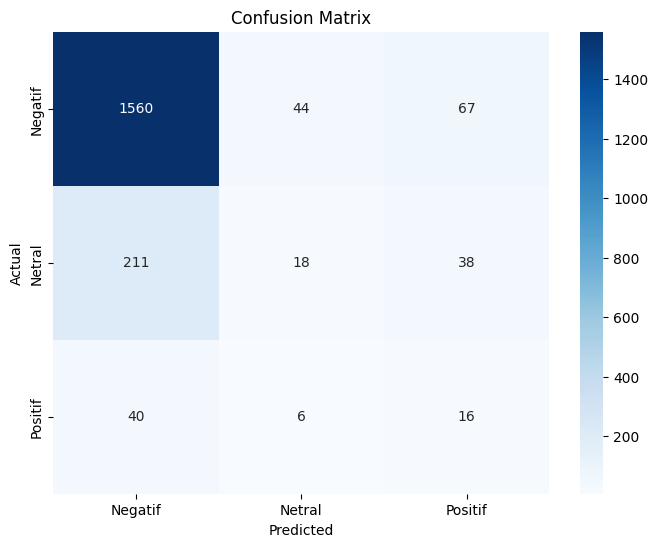

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negatif', 'netral', 'positif'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


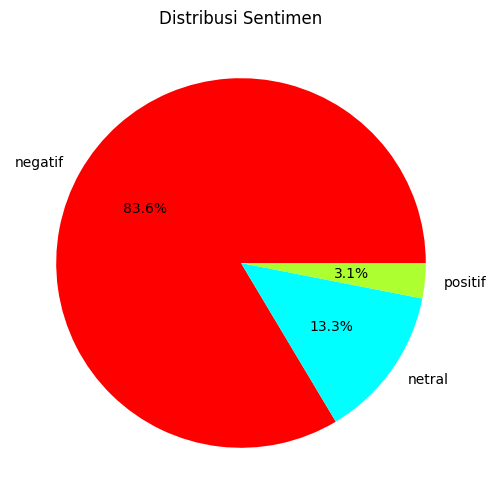

In [ ]:
#pie chart
sentiment_counts = sampled_data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF0000','#00FFFF','#ADFF2F'])
plt.title('Distribusi Sentimen')
plt.ylabel('')
plt.show()
